In [121]:
import torch
from torch import optim
from torch.optim import lr_scheduler
from torch import nn
model = nn.Linear(10,1)
optimizer = optim.SGD(model.parameters(), lr=0.001, weight_decay= 0.1
                      , momentum=0.9)
scheduler1 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor = 0.01, total_iters = 3)
scheduler2 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0 = 20,eta_min = 0.0000000001)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[scheduler1, scheduler2], milestones= [3])


In [122]:
lr = []
for i in range(20):
    lr.append(scheduler.get_last_lr())
    optimizer.step()
    scheduler.step()

In [123]:
lr

[[1e-05],
 [0.00034],
 [0.0006700000000000001],
 [0.001],
 [0.000993844170913152],
 [0.000975528260594751],
 [0.0009455032675438577],
 [0.0009045085067366241],
 [0.0008535534052379347],
 [0.000793892646756974],
 [0.0007269952771702484],
 [0.0006545085317366241],
 [0.0005782172746983923],
 [0.00050000005],
 [0.0004217828253016079],
 [0.00034549156826337604],
 [0.0002730048228297516],
 [0.00020610745324302612],
 [0.00014644669476206534],
 [9.549159326337604e-05]]

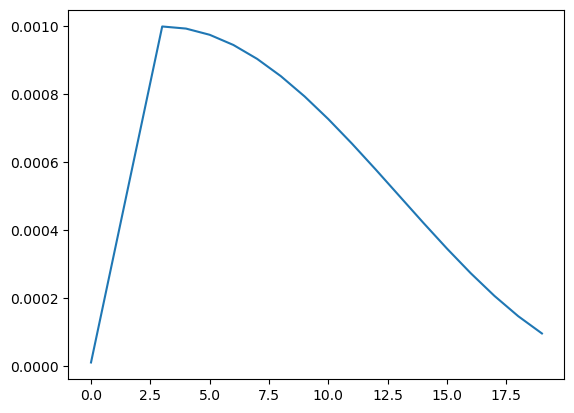

In [124]:
from matplotlib import pyplot as plt
plt.plot(lr)